In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression,Lasso,Ridge,ElasticNet
import scipy.stats
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
abalone=pd.read_csv('abalone.csv')
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

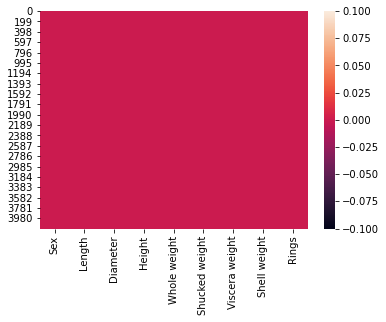

In [4]:
sns.heatmap(abalone.isnull())

In [5]:
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 277.4+ KB


In [7]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# EDA Analysis

In [8]:
dfcorr=abalone.corr()
dfcorr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


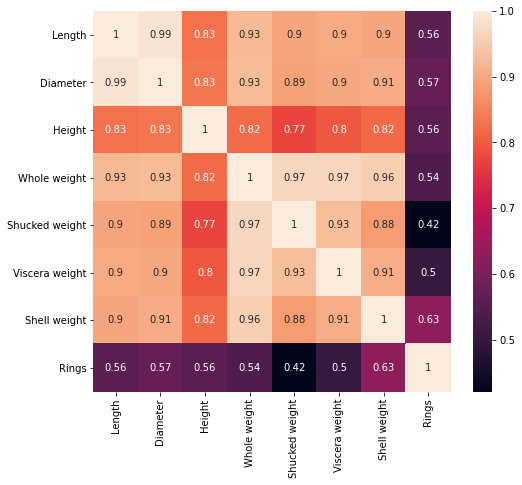

In [9]:
plt.figure(figsize=(8,7))
sns.heatmap(dfcorr,annot=True)
plt.show()

Text(0, 0.5, 'count')

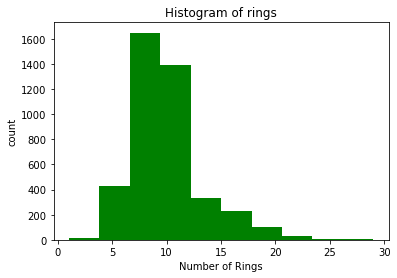

In [10]:
plt.hist(abalone.Rings,color='green')
plt.title('Histogram of rings')
plt.xlabel('Number of Rings')
plt.ylabel('count')

In [11]:
numeric_features = abalone.select_dtypes(include=[np.number])
correlation = numeric_features.corr()

In [12]:
print(correlation['Rings'].sort_values(ascending=False))

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64


<AxesSubplot:title={'center':'Correlation of numeric features'}>

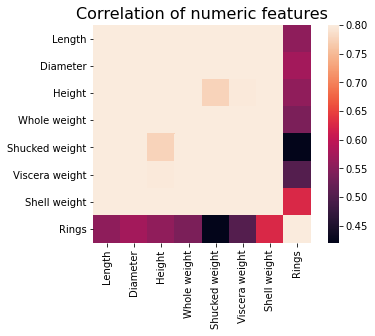

In [13]:
plt.title('Correlation of numeric features', y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

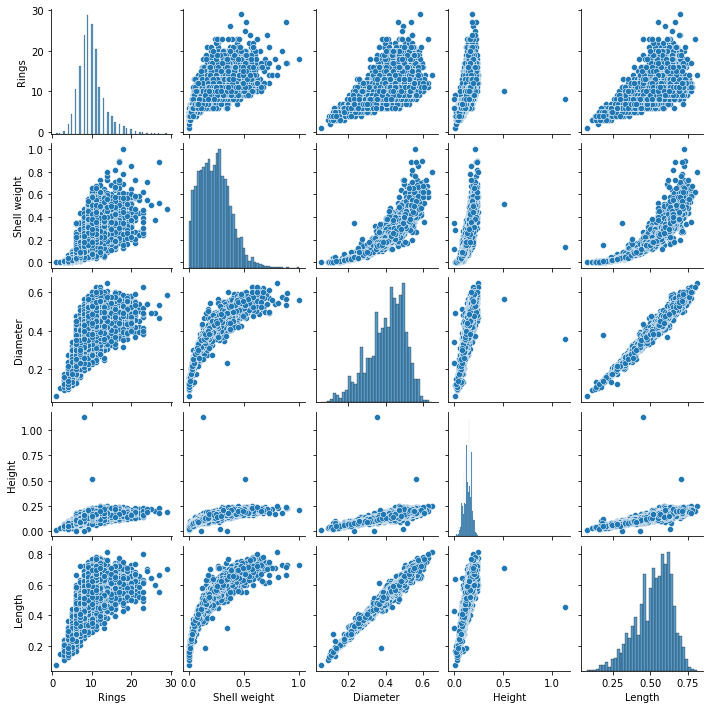

In [14]:
cols = ['Rings','Shell weight','Diameter','Height','Length']
sns.pairplot(abalone[cols],size=2,kind='scatter')
plt.show()

Text(0.5, 1.0, 'Count of the Gender of Abalone')

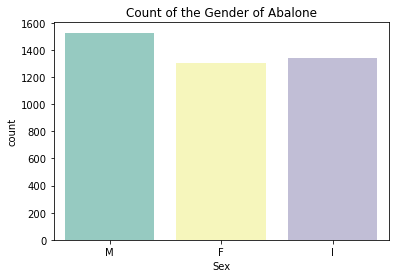

In [15]:
sns.countplot(abalone['Sex'], palette="Set3")
plt.title('Count of the Gender of Abalone')

Males are the most frequent Sex of Abalone in the dataset, while Infants just edge out Females.

Text(0.5, 1.0, 'Distribution of Rings')

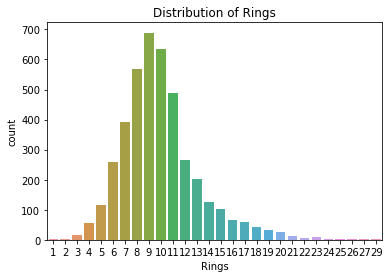

In [16]:
sns.countplot(abalone['Rings'])
plt.title('Distribution of Rings')

It appears that Abalone with Rings between 8-10 have the most observations.

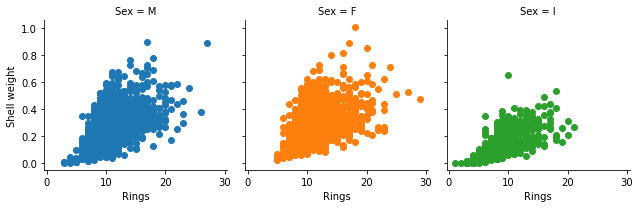

In [17]:
p = sns.FacetGrid(abalone, col="Sex", hue="Sex")
p=p.map(plt.scatter,"Rings", "Shell weight")

With this scatter plot I took the Shell weight because it has the highest correlation with Rings and tried to see how they compare against the different sexes.

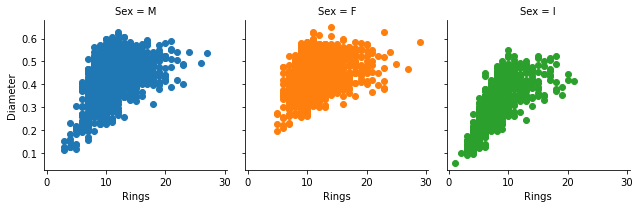

In [18]:
x = sns.FacetGrid(abalone,col="Sex",hue="Sex")
x.map(plt.scatter, "Rings", "Diameter")

In this Case it is the second highest correlated variable Diameter. Females only have observations starting from 0.2 mm in diameter and with clear outliers. Otherwise Males and Infants have rough a similar spread of the data.

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

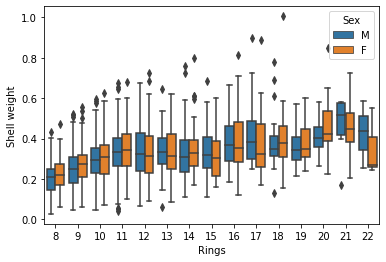

In [19]:
f = (abalone.loc[abalone['Sex'].isin(['M','F'])]
      .loc[:,['Shell weight','Rings','Sex']])

f = f[f["Rings"] >= 8]
f = f[f["Rings"] < 23]
sns.boxplot(x="Rings",y="Shell weight", hue='Sex',data=f)

This box plot allows us to clearly visualize the presence of outliers, meaning we will need to manage them before training on the data.

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

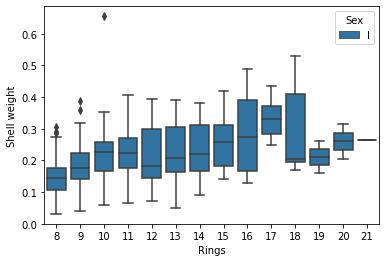

In [20]:
w = (abalone.loc[abalone['Sex'].isin(['I'])]
    .loc[:,['Shell weight','Rings','Sex']])
w = w[w["Rings"] >= 8]
w = w[w["Rings"] < 23]
sns.boxplot(x="Rings",y="Shell weight", hue='Sex',data=w)

As there is only one signifincant outlier while it is clear that infants have Rings in the range of 8 -21.

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

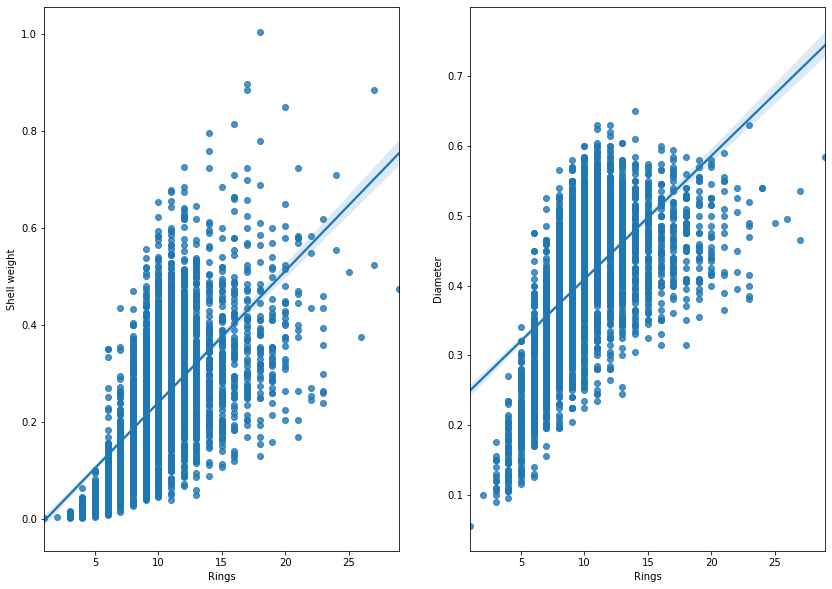

In [21]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,10))

ShellWeight_plot = pd.concat([abalone['Rings'],abalone['Shell weight']],axis=1)
sns.regplot(x='Rings',y='Shell weight',data=ShellWeight_plot,scatter=True,fit_reg=True,ax=ax1)

Diameter_plot = pd.concat([abalone['Rings'],abalone['Diameter']],axis=1)
sns.regplot(x='Rings',y='Diameter',data=Diameter_plot,scatter=True,fit_reg=True,ax=ax2)

# Data Cleaning

In [22]:
from scipy import stats
z= np.abs(stats.zscore(abalone.select_dtypes(include=[np.number])))
print(z)

[[0.57455813 0.43214879 1.06442415 ... 0.72621157 0.63821689 1.57154357]
 [1.44898585 1.439929   1.18397831 ... 1.20522124 1.21298732 0.91001299]
 [0.05003309 0.12213032 0.10799087 ... 0.35668983 0.20713907 0.28962385]
 ...
 [0.6329849  0.67640943 1.56576738 ... 0.97541324 0.49695471 0.28962385]
 [0.84118198 0.77718745 0.25067161 ... 0.73362741 0.41073914 0.02057072]
 [1.54905203 1.48263359 1.32665906 ... 1.78744868 1.84048058 0.64095986]]


In [23]:
abalone_o = abalone[(z < 3).all(axis=1)]

In [24]:
print("Shape of Abalones with outliers: "+ str(abalone.shape) , 
      "Shape of Abalones without outliers: " + str(abalone_o.shape))

Shape of Abalones with outliers: (4177, 9) Shape of Abalones without outliers: (4027, 9)


In [25]:
abalone_o

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [26]:
x=abalone_o.iloc[:,1:8]
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [27]:
y=abalone_o["Rings"]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

In [28]:
x.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

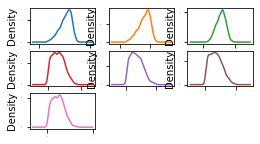

In [29]:
x.plot(kind='density',subplots=True,layout=(4,3),sharex=False,legend=False,fontsize=1,figsize=(4,3))
plt.show()

In [30]:
'''from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()'''

'from sklearn.preprocessing import power_transform\ndf_new=power_transform(x)\ndf_new=pd.DataFrame(df_new,columns=x.columns)\ndf_new.skew()'

In [31]:
'''from sklearn.preprocessing import power_transform
df_new2=power_transform(df_new)
df_new2=pd.DataFrame(df_new2,columns=x.columns)
df_new2.skew()'''

'from sklearn.preprocessing import power_transform\ndf_new2=power_transform(df_new)\ndf_new2=pd.DataFrame(df_new2,columns=x.columns)\ndf_new2.skew()'

In [32]:
'''x=df_new2
x'''

'x=df_new2\nx'

In [33]:
'''from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaledx=scalar.fit_transform(x)
scaledx'''

'from sklearn.preprocessing import StandardScaler\nscalar=StandardScaler()\nscaledx=scalar.fit_transform(x)\nscaledx'

In [34]:
#x=scaledx

# Model Building

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [36]:
Im=LinearRegression()

In [37]:
Im.fit(x_train,y_train)

LinearRegression()

In [38]:
Im.score(x_train,y_train)

0.5124981280141683

In [39]:
pred=Im.predict(x_test)
print('Predicted result price',pred)
print('Actual price',y_test)

Predicted result price [ 5.40805744  8.67452629  7.82315526 ...  9.90261519 10.69228665
  8.9928421 ]
Actual price 1988     5
1113     8
1240     6
3885     7
1976    13
        ..
3896    14
965      8
1151     7
3123     9
2880     8
Name: Rings, Length: 1329, dtype: int64


In [40]:
print("Linear Regression error:")
print("Mean Absolute error:",mean_absolute_error(y_test,pred))
print("Mean Squared error:",mean_squared_error(y_test,pred))
print("Root Mean Squared error:",np.sqrt(mean_absolute_error(y_test,pred)))

Linear Regression error:
Mean Absolute error: 1.5244375655775013
Mean Squared error: 4.075551809390285
Root Mean Squared error: 1.2346811594810627


In [41]:
print("R Square error:",r2_score(y_test,pred))

R Square error: 0.5121599559105545


In [42]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.5124759402720971

In [43]:
Rd=Ridge(alpha=0.0001)
Rd.fit(x_train,y_train)
Rd.score(x_train,y_train)

0.512498127610933

In [44]:
from sklearn.svm import SVR
kernellist=['linear','rbf','poly']

for i in kernellist:
    svr=SVR(kernel=i)
    svr.fit(x_train,y_train)
    print(svr.score(x_train,y_train))

0.4581366988112664
0.5272003238231127
0.4477868211189483


In [46]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Rd, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.5064712071353706
Best Params:  {'alpha': 0.1}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    3.2s finished


In [48]:
Final_mod=Ridge(alpha=0.1)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print(Final_mod.score(x_train,y_train))

0.5122027467371582


In [49]:
import joblib
joblib.dump(Final_mod,"AbaloneProject.pkl")

['AbaloneProject.pkl']